<a href="https://colab.research.google.com/github/AbdulWahabRaza123/FYP_ML/blob/main/TrainModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
from tensorflow.keras.applications import densenet
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
import cv2
import tensorflow as tf
import re
import pickle
from PIL import Image
from skimage.transform import resize
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import time
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Embedding, Conv2D, Concatenate, Flatten, Add, Dropout, GRU
import random
import datetime
from nltk.translate.bleu_score import sentence_bleu

In [21]:
# from google.colab import drive
# drive.mount('/content/drive')

In [22]:
train_data = pd.read_csv('/content/drive/MyDrive/FYP/NewDataSetTemp/Final_Train_Data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/FYP/NewDataSetTemp/Final_Test_Data.csv')
cv_data = pd.read_csv('/content/drive/MyDrive/FYP/NewDataSetTemp/Final_CV_Data.csv')

In [ ]:
print('train data shape : ',train_data.shape)
train_data.head(2)

In [ ]:
print('test data shape : ',test_data.shape)
test_data.head(2)

In [ ]:
print('CV data shape : ',cv_data.shape)
cv_data.head(2)

In [23]:
chexNet = densenet.DenseNet121(include_top=False, weights = None,   input_shape=(224,224,3), pooling="avg")
X = chexNet.output
X = Dense(14, activation="sigmoid", name="predictions")(X)
model = Model(inputs=chexNet.input, outputs=X)

In [8]:
# !gdown "https://drive.google.com/drive/u/0/my-drive"

In [9]:
# ! gdown "https://openi.nlm.nih.gov/imgs/collections/NLMCXR_png.tgz"

In [10]:
# import shutil
# shutil.unpack_archive("/content/NLMCXR_png.tgz","/content/NLMCXR_png")

In [20]:
# !gdown "https://drive.google.com/u/0/uc?id=19BllaOvs2x5PLV_vlWMy4i8LapLb2j6b&export=download"

In [10]:
#loadind pretrained weights for ChexNet model
# model.load_weights('brucechou1983_CheXNet_Keras_0.3.0_weights.h5')
model.load_weights('/content/drive/MyDrive/FYP/NewDataSetTemp/brucechou1983_CheXNet_Keras_0.3.0_weights.h5')

In [24]:
chexNet = Model(inputs = model.input, outputs = model.layers[-2].output)

In [ ]:
chexNet.summary()

In [ ]:
tf.keras.utils.plot_model(chexNet,show_shapes=True, dpi = 42)

In [23]:
def load_image(img_name):
    image = Image.open(img_name)
    X = np.asarray(image.convert("RGB"))
    X = np.asarray(X)
    X = preprocess_input(X)
    X = resize(X, (224,224,3))
    X = np.expand_dims(X, axis=0)
    X = np.asarray(X)
    return X

(1, 224, 224, 3)


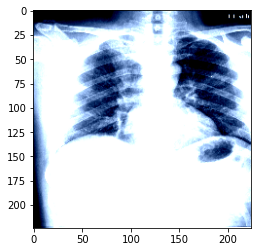

In [24]:
img = load_image('/content/drive/MyDrive/FYP/images/1000_IM-0003-1001.dcm.png')
print(img.shape)
plt.imshow(img[0])

In [ ]:
img = load_image('/content/drive/MyDrive/FYP/images/1001_IM-0004-1001.dcm.png')
plt.imshow(img[0])

In [ ]:
img = load_image('/content/drive/MyDrive/FYP/images/1004_IM-0005-2001.dcm.png')
plt.imshow(img[0])

In [20]:
# train_data.values

In [21]:
# img = load_image('/content/drive/MyDrive/FYP/images/1004_IM-0005-2001.dcm.png')
# chexNet.predict(img)

In [22]:
# Xnet_features = {}
# for key, img1, img2, finding in tqdm(train_data.values):
#     i1 = load_image("/content/drive/MyDrive/FYP/images/"+img1)
#     img1_features = chexNet.predict(i1)    
#     i2 = load_image("/content/drive/MyDrive/FYP/images/"+img2)
#     img2_features = chexNet.predict(i2)
#     input_ = np.concatenate((img1_features, img2_features), axis=1)
#     Xnet_features[key] = input_

# for key, img1, img2, finding in tqdm(test_data.values):
#     i1 = load_image("/content/drive/MyDrive/FYP/images/"+img1)
#     img1_features = chexNet.predict(i1)    
#     i2 = load_image("/content/drive/MyDrive/FYP/images/"+img2)
#     img2_features = chexNet.predict(i2)
#     input_ = np.concatenate((img1_features, img2_features), axis=1)
#     Xnet_features[key] = input_

# for key, img1, img2, finding in tqdm(cv_data.values):
#     i1 = load_image("/content/drive/MyDrive/FYP/images/"+img1)
#     img1_features = chexNet.predict(i1)    
#     i2 = load_image("/content/drive/MyDrive/FYP/images/"+img2)
#     img2_features = chexNet.predict(i2)
#     input_ = np.concatenate((img1_features, img2_features), axis=1)
#     Xnet_features[key] = input_

In [23]:
# Xnet_features

In [24]:
# Xnet_features["1_IM-0001_0"].shape

In [25]:
# Xnet_features["2_IM-0652_0"].shape

In [26]:
# Xnet_features["1_IM-0001_0"]

In [27]:
# train_data[:5]

In [28]:
# # save the file for future use
# f = open('Image_features_ecoder_decoder.pickle','wb')
# pickle.dump(Xnet_features, f)
# f.close()

In [25]:
with open("/content/drive/MyDrive/FYP/NewDataSetTemp/Image_features_ecoder_decoder.pickle", 'rb') as filehandle:
    Xnet_features = pickle.load(filehandle)

In [11]:
len(Xnet_features)

3707

In [12]:
train_data['Person_id'].head()

0    1_IM-0001_0
1    2_IM-0652_0
2    4_IM-2050_0
3    5_IM-2117_0
4    6_IM-2192_0
Name: Person_id, dtype: object

In [13]:
train_data['Report'].head()

0    startseq the cardiac silhouette and mediastinu...
1    startseq borderline cardiomegaly .  midline st...
2    startseq there are diffuse bilateral interstit...
3    startseq the cardiomediastinal silhouette and ...
4    startseq heart size and mediastinal contour ar...
Name: Report, dtype: object

In [26]:
# for encoder and decoder 
X_train = train_data['Person_id']
X_test = test_data['Person_id']
X_cv = cv_data['Person_id']
y_train = train_data['Report']
y_test =  test_data['Report']
y_cv =  cv_data['Report']

In [27]:
cheXnet_Features = Xnet_features

In [28]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(y_train.values)

In [27]:
# y_train

In [25]:
pading_size = 153   # Max length

In [26]:
tokenizer.word_index.keys()

dict_keys(['.', 'the', 'no', 'are', 'normal', 'startseq', 'endseq', 'and', 'there', 'pleural', 'pneumothora', 'effusion', 'heart', 'lungs', 'size', 'focal', 'within', 'limits', 'clear', 'pulmonary', 'consolidation', 'silhouette', 'right', 'mediastinal', 'airspace', 'cardiomediastinal', 'left', 'lung', 'acute', 'with', 'disease', 'stable', 'unremarkable', 'mediastinum', 'spine', 'changes', 'thoracic', 'structures', 'contours', 'bony', 'contour', 'degenerative', 'mild', 'large', 'seen', 'without', 'cardiac', 'calcified', 'opacity', 'appear', 'osseous', 'effusions', 'vascularity', 'for', 'abnormality', 'upper', 'intact', 'evidence', 'opacities', 'visualized', 'lateral', 'chest', 'vasculature', 'lobe', 'noted', 'identified', 'aorta', 'air', 'bilaterally', 'volumes', 'lower', 'findings', 'atelectasis', 'present', 'infiltrate', 'low', 'edema', 'prior', 'grossly', 'space', 'free', 'unchanged', 'granuloma', 'enlarged', 'bilateral', 'rib', 'base', 'scarring', 'pneumothoraces', 'appearance', 'sm

In [27]:
vocab_size = len(tokenizer.word_index.keys()) + 1

In [40]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip

In [41]:
# !unzip glove*.zip

In [42]:
# !wget http://evexdb.org/pmresources/ngrams/PMC/2-grams-2013.tsv.gz

In [43]:
# !wget https://archive.org/download/pubmed2018_w2v_200D.tar/pubmed2018_w2v_200D.tar.gz

In [44]:
# with open("/content/drive/MyDrive/FYP/NewDataSetTemp/pubmed2018_w2v_200D.tar","rb") as f:
#     data = f.read()

In [45]:
# import  tarfile
# tar = tarfile.open("/content/drive/MyDrive/FYP/NewDataSetTemp/pubmed2018_w2v_200D.tar")
# tar.getmembers()

In [46]:
# index = tar.getnames()
# index

In [47]:
# import pprint
# pprint.pprint(index)

In [48]:
# import tarfile
  
# # # open file
# file = tarfile.open('/content/drive/MyDrive/FYP/NewDataSetTemp/pubmed2018_w2v_200D.tar')
  
# # extracting file
# file.extractall('/content/drive/MyDrive/FYP/NewDataSetTemp')
  
# file.close()

In [28]:
from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/FYP/NewDataSetTemp/pubmed2018_w2v_200D/pubmed2018_w2v_200D.bin', binary=True)
# word_vectors.most_similar(positive=['chest'])

In [24]:
# word_vectors.wv.vocab

In [25]:
# dir(word_vectors)

In [26]:
# word_vectors["liver"]

In [53]:
# from gensim.models import KeyedVectors
# word_vectors = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/FYP/NewDataSetTemp/pubmed2018_w2v_200D.tar', binary=True)
# word_vectors.most_similar(positive=['chest'])

In [29]:
embedding_matrix = np.zeros((vocab_size,200))
for word, i in tokenizer.word_index.items():
    if word in word_vectors.wv.vocab:
        vec = word_vectors[word]
        embedding_matrix[i] = vec
    else:
        continue

In [29]:
# embedding_matrix

In [56]:
# !pip install sh

In [57]:
# import gzip
# # with gzip.open('/content/2-grams-2013.tsv.gz') as f:
# with gzip.open('/content/2-grams-2013.tsv.gz', 'rb') as f:
#   vector = pd.read_csv(f)
# from sh import gunzip

# gunzip('/content/pubmed2018_w2v_200D.tar.gz')
    

In [58]:
# f = open('/content/drive/MyDrive/FYP/NewDataSetTemp/pubmed2018_w2v_200D.tar') 
# # bioMed = pickle.load(f)
# print(f)
# for line in f:
#   print(line)
# f.close()

In [59]:
# f = open('/content/drive/MyDrive/FYP/NewDataSetTemp/glove_vectors', encoding='utf-8')
# for line in f:
#   values = line.split()
#   word = values[1:]
#   print("This is line ",word)
# f.close()

In [60]:
# f = open('/content/drive/MyDrive/FYP/2-grams-2013.tsv', encoding='utf-8')
# for line in f:
#   print("This is line ",line)

In [61]:
# embedding_matrix = np.zeros((vocab_size,300))
# for word, i in tokenizer.word_index.items():
#     if word in glove_vectors.keys():
#         vec = glove_vectors[word]
#         embedding_matrix[i] = vec
#     else:
#         continue

In [62]:
# print('Indexing word vectors.')

# embeddings_index = {}
# f = open('/content/drive/MyDrive/FYP/2-grams-2013.tsv', encoding='utf-8')
# for line in f:
#     values = line.split()
#     word = values[0]
#     print("This is value ",word)
#     coefs = np.asarray(values, dtype='float32')
#     embeddings_index[word] = coefs
# f.close()

# print('Found %s word vectors.' % len(embeddings_index))

In [63]:
# import pickle
# pickle.dump({'embeddings_index' : embeddings_index } , open('/content/drive/MyDrive/FYP/NewDataSetTemp/glove_vectors', 'wb'))

In [64]:
# import shutil
# shutil.unpack_archive("/content/2-grams-2013.tsv.gz","/content/2-grams-2013.tsv")

In [65]:
# f = open('/content/drive/MyDrive/FYP/NewDataSetTemp/glove_vectors','rb') # 300d glove vectors  
# glove_vectors = pickle.load(f)
# f.close()

In [66]:
# glove_vectors

In [67]:
# glove_vectors['embeddings_index'].keys()

In [68]:
# !wget http://evexdb.org/pmresources/ngrams/PMC/filelist
# !for url in `cat filelist` ; do wget -c $url ; done

In [69]:
# !for url in `cat filelist | grep 2-grams` ; do wget -c $url ; done

In [70]:
# !wget -c http://evexdb.org/pmresources/ngrams/PMC/2-grams-2013.tsv.gz

In [71]:
# embedding_matrix = np.zeros((vocab_size,300))
# for word, i in tokenizer.word_index.items():
#     # print("This is word ",word)
#     if word in glove_vectors.keys():
#         print(f"This is vector for ",word)
#         vec = glove_vectors[word]
#         print(f"This is vector for ",word)
#         embedding_matrix[i] = vec
#     else:
#         continue

In [30]:
# embedding_matrix[20]

In [30]:
BATCH_SIZE = 12

In [31]:
def load_image(id_, report):
    '''Loads the Image Features with their corresponding Ids'''
    img_feature = cheXnet_Features[id_.decode('utf-8')][0]
    return img_feature, report

In [32]:
def dataset_generator(img_name, caption):
  
    dataset = tf.data.Dataset.from_tensor_slices((img_name, caption))

  # Use map to load the numpy files in parallel
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(load_image, [item1, item2], [tf.float32, tf.string]),
                          num_parallel_calls=tf.data.experimental.AUTOTUNE)

  # Shuffle and batch
    dataset = dataset.shuffle(500).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [33]:
train_generator = dataset_generator(X_train, y_train)
cv_generator = dataset_generator(X_cv, y_cv)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [34]:
def bytes_to_string(arr):
    '''The generator gives provides data in bytes. This function converts them back to strings for manipulation'''
    for i in range(len(arr)):
        arr[i] = arr[i].decode('utf-8')
    return arr

In [35]:
def convert(images, reports):
    '''This function takes the batch of data and converts them into a new dataset'''
    imgs = []
    in_reports = []
    out_reports = []
    for i in range(len(images)):
        sequence = [tokenizer.word_index[e] for e in reports[i].split() if e in tokenizer.word_index.keys()]
      #  print(sequence)
        for j in range(1,len(sequence)):

            in_seq = sequence[:j]
            out_seq = sequence[j]
            out_seq = tf.keras.utils.to_categorical(out_seq, num_classes=vocab_size)

            imgs.append(images[i])
          #  print(in_seq)
            in_reports.append(in_seq)
           # print(out_seq)
            out_reports.append(out_seq)
        
    return np.array(imgs), np.array(in_reports), np.array(out_reports)

In [36]:
input1 = Input(shape=(2048), name='Image_input')
dense1 = Dense(256, kernel_initializer=tf.keras.initializers.glorot_uniform(seed = 56), name='dense_encoder')(input1)

input2 = Input(shape=(153), name='Text_Input')
embedding_layer = Embedding(input_dim = vocab_size, output_dim = 200, input_length=153, mask_zero=True, trainable=False, 
                weights=[embedding_matrix], name="Embedding_layer")
emb = embedding_layer(input2)

LSTM1 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
            kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
            recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
            bias_initializer=tf.keras.initializers.zeros(), return_sequences=True, name="LSTM1")(emb)
#LSTM1_output = LSTM1(emb)

LSTM2 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
            kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
            recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
            bias_initializer=tf.keras.initializers.zeros(), name="LSTM2")
LSTM2_output = LSTM2(LSTM1)

dropout1 = Dropout(0.5, name='dropout1')(LSTM2_output)

dec =  tf.keras.layers.Add()([dense1, dropout1])

fc1 = Dense(256, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(seed = 63), name='fc1')
fc1_output = fc1(dec)
dropout2 = Dropout(0.4, name='dropout2')(fc1_output)
output_layer = Dense(vocab_size, activation='softmax', name='Output_layer')
output = output_layer(dropout2)

encoder_decoder = Model(inputs = [input1, input2], outputs = output)
encoder_decoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Text_Input (InputLayer)        [(None, 153)]        0           []                               
                                                                                                  
 Embedding_layer (Embedding)    (None, 153, 200)     291600      ['Text_Input[0][0]']             
                                                                                                  
 LSTM1 (LSTM)                   (None, 153, 256)     467968      ['Embedding_layer[0][0]']        
                                                                                                  
 Image_input (InputLayer)       [(None, 2048)]       0           []                               
                                                                                            

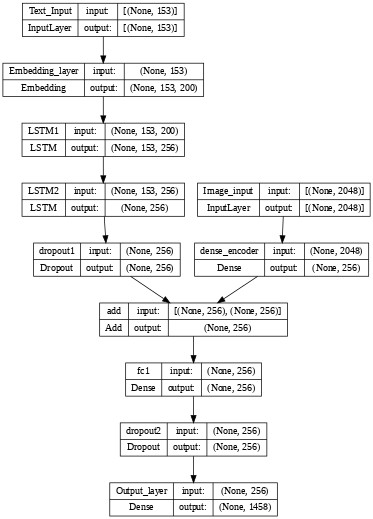

In [38]:
tf.keras.utils.plot_model(encoder_decoder,show_shapes=True, dpi = 52)

In [37]:
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=False, reduction='auto')

def maskedLoss(y_true, y_pred):
    #getting mask value
    mask = tf.math.logical_not(tf.math.equal(y_true, 0))
    
    #calculating the loss
    loss_ = loss_function(y_true, y_pred)
    
    #converting mask dtype to loss_ dtype
    mask = tf.cast(mask, dtype=loss_.dtype)
    
    #applying the mask to loss
    loss_ = loss_*mask
    
    #getting mean over all the values
    loss_ = tf.reduce_mean(loss_)
    return loss_

In [82]:
# optimizer = tf.keras.optimizers.Adam(0.001)
# encoder_decoder.compile(optimizer, loss = maskedLoss)

# current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# train_log_dir = 'Tensorboard/logs_m1/fit3/' + current_time + '/train'
# val_log_dir = 'Tensorboard/logs_m1/fit3/' + current_time + '/test'
# train_summary_writer = tf.summary.create_file_writer(train_log_dir)
# val_summary_writer = tf.summary.create_file_writer(val_log_dir)

In [81]:
# for img, report in cv_generator:
#    print(img)

In [80]:
# #training for 20 epochs
# epoch_train_loss = []
# epoch_val_loss = []

# for epoch in range(20):
#     print('EPOCH : ',epoch+1)
#     start = time.time()
#     batch_loss_tr = 0
#     batch_loss_vl = 0
    
#     for img, report in train_generator:
       
#         r1 = bytes_to_string(report.numpy())
#         img_input, rep_input, output_word = convert(img.numpy(), r1)
#         rep_input = pad_sequences(rep_input, maxlen=153, padding='post')
#         results = encoder_decoder.train_on_batch([img_input, rep_input], output_word)
        
#         batch_loss_tr += results

#     train_loss = batch_loss_tr/(X_train.shape[0]//14)
#  #   print('Saving Tensorboard')
#     with train_summary_writer.as_default():
#         tf.summary.scalar('loss', train_loss, step = epoch)
    
#     for img, report in cv_generator:
        
#         r1 = bytes_to_string(report.numpy())
#         img_input, rep_input, output_word = convert(img.numpy(), r1)
#         rep_input = pad_sequences(rep_input, maxlen=153, padding='post')
#         results = encoder_decoder.test_on_batch([img_input, rep_input], output_word)
#         batch_loss_vl += results
    
#     val_loss = batch_loss_vl/(X_cv.shape[0]//14)
    
#     with val_summary_writer.as_default():
#         tf.summary.scalar('loss', val_loss, step = epoch)

#     epoch_train_loss.append(train_loss)

#     epoch_val_loss.append(val_loss)
    
#     print('Training Loss: {},  Val Loss: {}'.format(train_loss, val_loss))
#     print('Time Taken for this Epoch : {} sec'.format(time.time()-start))   
#     encoder_decoder.save_weights('encoder_decoder_epoch_'+ str(epoch+1) + '.h5')
#     print('--------------------------------------------------------------------------------------------')

In [ ]:
plt.figure(figsize=(9,5))

plt.plot(epoch_train_loss)
plt.plot(epoch_val_loss)

plt.title('Loss per epoch')

In [29]:
encoder_decoder.load_weights("/content/encoder_decoder_epoch_11.h5")

NameError: ignored

In [72]:
# encoder
encoder_input = encoder_decoder.input[0]
encoder_output = encoder_decoder.get_layer('dense_encoder').output
encoder_model = Model(encoder_input, encoder_output)

# decoder# 
text_input = encoder_decoder.input[1]
enc_output = Input(shape=(256,), name='Enc_Output')
text_output = encoder_decoder.get_layer('LSTM2').output
add1 = tf.keras.layers.Add()([text_output, enc_output])
fc_1 = fc1(add1)
decoder_output = output_layer(fc_1)

decoder_model = Model(inputs = [text_input, enc_output], outputs = decoder_output)

In [79]:
# decoder_model.save('/content/drive/MyDrive/FYP/report_decoder_model.h5')
# encoder_model.save('/content/drive/MyDrive/FYP/report_encoder_model.h5')

#Import Model Here from drive

In [30]:
encoder_model=tf.keras.models.load_model('/content/drive/MyDrive/FYP/report_encoder_model.h5')
decoder_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/report_decoder_model.h5')

In [31]:
def greedysearch(img):
    image = cheXnet_Features[img]
    input_ = 'startseq'
    image_features = encoder_model.predict(image)
    
    result = []
    for i in range(153):
        input_tok = [tokenizer.word_index[w] for w in input_.split()]
        input_padded = pad_sequences([input_tok], 153, padding='post')
        predictions = decoder_model.predict([input_padded, image_features])
        arg = np.argmax(predictions)
        if arg != 7:   # endseq
            result.append(tokenizer.index_word[arg])
            input_ = input_ + ' ' + tokenizer.index_word[arg]
        else:
            break
    rep = ' '.join(e for e in result)
    return rep

In [32]:
def load_image(img_name):
    image = Image.open(img_name)
    X = np.asarray(image.convert("RGB"))
    X = np.asarray(X)
    X = preprocess_input(X)
    X = resize(X, (224,224,3))
    X = np.expand_dims(X, axis=0)
    X = np.asarray(X)
    return X

In [33]:
def get_result(idx=0):
  
  plt.figure(figsize=(9,5))

  pre_Report = greedysearch(cv_data['Person_id'][idx]) # result after 20 epochs
  print('------------------------------------------------------------------------------------------------------')
  print("Predicted Report : ",pre_Report)
  print('------------------------------------------------------------------------------------------------------')
  print("Actual Report : ",cv_data['Report'][idx])

  plt.subplot(121)
  img = load_image("/content/drive/MyDrive/FYP/images/"+cv_data['Image1'][idx])
  plt.imshow(img[0])

  plt.subplot(122)
  img = load_image("/content/drive/MyDrive/FYP/images/"+cv_data['Image2'][idx])
  plt.imshow(img[0])

1/1 [==============================] - 0s 71ms/step


------------------------------------------------------------------------------------------------------
Predicted Report :  the cardiomediastinal silhouette within normal limits for appearance . no focal areas pulmonary consolidation . no pneumothora . no pleural effusion . the thoracic spine appears intact .
------------------------------------------------------------------------------------------------------
Actual Report :  startseq evaluation limited body habitus and technique .  enteric suction catheter courses below diaphragm and film .  stable heart size and mediastinal contours .  low lung volumes .  no pneumothora .  cardiac generator leads over the right atrium and right ventricle .  two bilateral pleural effusions .  endseq


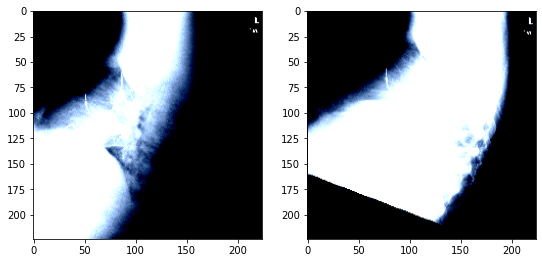

In [34]:
get_result(30)
# cv_data['Person_id'][0]

In [126]:
# cv_data['Person_id'][0]

In [160]:
# image_features = encoder_model.predict(cheXnet_Features[cv_data['Person_id'][0]])
# image_features

In [161]:
# get_result(98)

##Blue Score

In [35]:
def rem_fullstops(text):
    '''Removes punctuations'''
    punctuations = '''.''' # full stop is not removed
    new_text = []
    for char in text:
        if char in punctuations: 
            text = text.replace(char, "")
    new_text.append(' '.join(e for e in text.split()))
    return new_text[0]

##CV

In [36]:
from tqdm.notebook import tqdm

bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []
for img, rep in tqdm(zip(X_cv.values, y_cv.values)):
    
    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)
    
    pred_rep = greedysearch(img)
    pred_rep = rem_fullstops(pred_rep)
    
    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 87ms/step


In [37]:
a = sum(bleu1)/X_cv.shape[0]
b = sum(bleu2)/X_cv.shape[0]
c = sum(bleu3)/X_cv.shape[0]
d = sum(bleu4)/X_cv.shape[0]

print('Bleu1 Score: ',a)
print('Bleu2 Score: ',b)
print('Bleu3 Score: ',c)
print('Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg Blue score:",(a+b+c+d)/4)

Bleu1 Score:  0.20826789094356155
Bleu2 Score:  0.11634576681021343
Bleu3 Score:  0.07854804468646324
Bleu4 Score:  0.046237087270728644
-----------------------------------------------------------------------
Avg Blue score: 0.11234969742774173


##Beam Search

In [38]:
# beam_width = 2
def beamsearch(image, beam_width = 2):
    
    start = [tokenizer.word_index['startseq']]

    sequences = [[start, 0]]
    
    img_features = cheXnet_Features[image]
    img_features = encoder_model.predict(img_features)
    finished_seq = []
    
    for i in range(153):
        all_candidates = []
        new_seq = []
        for s in sequences:

            text_input = pad_sequences([s[0]], 153, padding='post')
            predictions = decoder_model.predict([text_input,img_features])
            top_words = np.argsort(predictions[0])[-beam_width:] 
            seq, score = s
            
            for t in top_words:
                candidates = [seq + [t], score - np.log(predictions[0][t])]
                all_candidates.append(candidates)
                
        sequences = sorted(all_candidates, key = lambda l: l[1])[:beam_width]
        # checks for 'endseq' in each seq in the beam
        count = 0
        for seq,score in sequences:
            if seq[len(seq)-1] == tokenizer.word_index['endseq']:
                score = score/len(seq)   # normalized
                finished_seq.append([seq, score])
                count+=1
            else:
                new_seq.append([seq, score])
        beam_width -= count
        sequences = new_seq
        
        # if all the sequences reaches its end before 155 timesteps
        if not sequences:
            break
        else:
            continue
        
    sequences = finished_seq[-1] 
    rep = sequences[0]
    score = sequences[1]
    temp = []
    rep.pop(0)
    for word in rep:
        if word != tokenizer.word_index['endseq']:
            temp.append(tokenizer.index_word[word])
        else:
            break    
    rep = ' '.join(e for e in temp)        
    
    return rep, score

In [39]:
def get_result(beam_width,idx=0):
  
  plt.figure(figsize=(9,5))

  pre_Report,Score = beamsearch(cv_data['Person_id'][idx],beam_width) # result after 20 epochs
  print('------------------------------------------------------------------------------------------------------')
  print("Predicted Report : ",pre_Report)
  print('Score is :',Score)
  print('------------------------------------------------------------------------------------------------------')
  print("Actual Report : ",cv_data['Report'][idx])

  plt.subplot(121)
  img = load_image("/content/drive/MyDrive/FYP/images/"+cv_data['Image1'][idx])
  plt.imshow(img[0])

  plt.subplot(122)
  img = load_image("/content/drive/MyDrive/FYP/images/"+cv_data['Image2'][idx])
  plt.imshow(img[0])

1/1 [==============================] - 0s 88ms/step


------------------------------------------------------------------------------------------------------
Predicted Report :  the lungs are clear . there no pleural effusion pneumothora . the heart not significantly enlarged . there are atherosclerotic changes the aorta . arthritic changes the skeletal structures are noted .
Score is : 0.12302740110146046
------------------------------------------------------------------------------------------------------
Actual Report :  startseq the heart normal size .  the mediastinum stable .  aorta tortuous .  calcified lymph are again identified .  there mild prominence the right paratracheal soft tissues stable appearance from prior studies .  there no acute infiltrate pleural effusion .  osteopenia and degenerative changes are identified .  deformity appears worse than prior study .  endseq


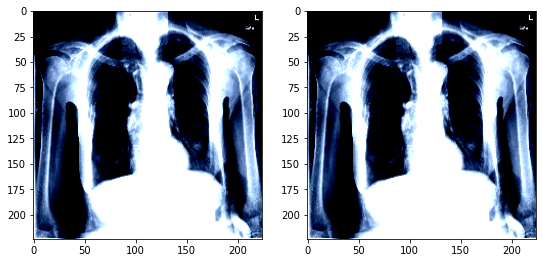

In [41]:
# beam_width = 2
get_result(2,5)

1/1 [==============================] - 0s 111ms/step
------------------------------------------------------------------------------------------------------
Predicted Report :  the lungs are clear . there no pleural effusion pneumothora . the heart not significantly enlarged . there are atherosclerotic changes the aorta . arthritic changes the skeletal structures are noted .
Score is : 0.14360988338354647
------------------------------------------------------------------------------------------------------
Actual Report :  startseq no focal areas consolidation .  no pleural effusions .  no pneumothora .  degenerative changes thoracic spine .  heart size normal limits .  cholecystectomy clips .  endseq


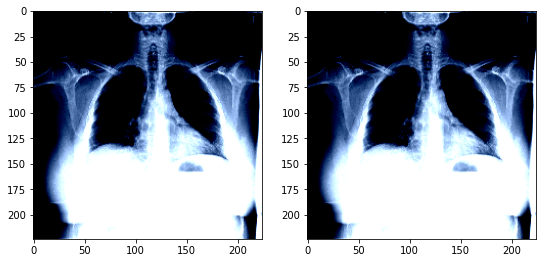

In [42]:
# beam_width = 2
get_result(2,7)

In [ ]:
from tqdm.notebook import tqdm
# beam_width = 2
'''CV'''

bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []
for img, rep in tqdm(zip(X_cv.values, y_cv.values)):
    
    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)
    
    pred_rep,score = beamsearch(img,2)
    pred_rep = rem_fullstops(pred_rep)
    
    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

a = sum(bleu1)/X_test.shape[0]
b = sum(bleu2)/X_test.shape[0]
c = sum(bleu3)/X_test.shape[0]
d = sum(bleu4)/X_test.shape[0]

print('CV Bleu1 Score: ',a)
print('CV Bleu2 Score: ',b)
print('CV Bleu3 Score: ',c)
print('CV Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg CV Blue score:",(a+b+c+d)/4)

print('=====================================================================================')

# beam_width = 2
'''TEST'''
bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []

for img, rep in tqdm(zip(X_test.values, y_test.values)):
    
    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)
    
    pred_rep,score = beamsearch(img,2)
    pred_rep = rem_fullstops(pred_rep)
    
    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

a = sum(bleu1)/X_test.shape[0]
b = sum(bleu2)/X_test.shape[0]
c = sum(bleu3)/X_test.shape[0]
d = sum(bleu4)/X_test.shape[0]

print('Test Bleu1 Score: ',a)
print('Test Bleu2 Score: ',b)
print('Test Bleu3 Score: ',c)
print('Test Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg Test Blue score:",(a+b+c+d)/4)

0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 5s 5s/step


In [ ]:
from tqdm.notebook import tqdm
# beam_width = 5
'''CV'''

bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []
for img, rep in tqdm(zip(X_cv.values, y_cv.values)):
    
    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)
    
    pred_rep,score = beamsearch(img,5)
    pred_rep = rem_fullstops(pred_rep)
    
    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

a = sum(bleu1)/X_test.shape[0]
b = sum(bleu2)/X_test.shape[0]
c = sum(bleu3)/X_test.shape[0]
d = sum(bleu4)/X_test.shape[0]

print('CV Bleu1 Score: ',a)
print('CV Bleu2 Score: ',b)
print('CV Bleu3 Score: ',c)
print('CV Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg CV Blue score:",(a+b+c+d)/4)

print('=====================================================================================')

# beam_width = 5
'''TEST'''
bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []

for img, rep in tqdm(zip(X_test.values, y_test.values)):
    
    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)
    
    pred_rep,score = beamsearch(img,5)
    pred_rep = rem_fullstops(pred_rep)
    
    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

a = sum(bleu1)/X_test.shape[0]
b = sum(bleu2)/X_test.shape[0]
c = sum(bleu3)/X_test.shape[0]
d = sum(bleu4)/X_test.shape[0]

print('Test Bleu1 Score: ',a)
print('Test Bleu2 Score: ',b)
print('Test Bleu3 Score: ',c)
print('Test Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg Test Blue score:",(a+b+c+d)/4)

In [ ]:
from tqdm.notebook import tqdm
# beam_width = 7
'''CV'''

bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []
for img, rep in tqdm(zip(X_cv.values, y_cv.values)):
    
    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)
    
    pred_rep,score = beamsearch(img,7)
    pred_rep = rem_fullstops(pred_rep)
    
    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

a = sum(bleu1)/X_test.shape[0]
b = sum(bleu2)/X_test.shape[0]
c = sum(bleu3)/X_test.shape[0]
d = sum(bleu4)/X_test.shape[0]

print('CV Bleu1 Score: ',a)
print('CV Bleu2 Score: ',b)
print('CV Bleu3 Score: ',c)
print('CV Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg CV Blue score:",(a+b+c+d)/4)

print('=====================================================================================')

# beam_width = 7
'''TEST'''
bleu1 = []
bleu2 = []
bleu3 = []
bleu4 = []

for img, rep in tqdm(zip(X_test.values, y_test.values)):
    
    rep = rem_fullstops(rep)
    rep = rep.split()[1:]
    rep = rep[:len(rep)-1]
    rep = ' '.join(e for e in rep)
    
    pred_rep,score = beamsearch(img,7)
    pred_rep = rem_fullstops(pred_rep)
    
    bleu1.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (1,0,0,0)))
    bleu2.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.5,0.5,0,0)))
    bleu3.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.33,0.33,0.33,0)))
    bleu4.append(sentence_bleu([rep.split()], pred_rep.split(), weights = (0.25,0.25,0.25,0.25)))

a = sum(bleu1)/X_test.shape[0]
b = sum(bleu2)/X_test.shape[0]
c = sum(bleu3)/X_test.shape[0]
d = sum(bleu4)/X_test.shape[0]

print('Test Bleu1 Score: ',a)
print('Test Bleu2 Score: ',b)
print('Test Bleu3 Score: ',c)
print('Test Bleu4 Score: ',d)

print('-----------------------------------------------------------------------')
print("Avg Test Blue score:",(a+b+c+d)/4)